In [1]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, Sequential, save_model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
train_dataset = 'train/'
test_dataset = 'test/'

# Configuração do gerador de dados para pré-processamento e aumento de dados
datagen = ImageDataGenerator(
    rescale=1./255,         # Normaliza os valores dos pixels para o intervalo [0, 1]
    #shear_range=0.2,        # Aplica corte aleatório
    #zoom_range=0.2,         # Aplica zoom aleatório
    #horizontal_flip=True,   # Inverte aleatoriamente as imagens horizontalmente
)

# Carrega e pré-processa as imagens de treinamento
train_generator = datagen.flow_from_directory(
    train_dataset,
    target_size=(224, 224),  # Tamanho das imagens esperado pela InceptionV3
    batch_size=32,
    class_mode='categorical', # 'categorical' se for classificação com mais de duas classes
    #subset='training'        # Especifica se é para conjunto de treinamento
)

# Carrega e pré-processa as imagens de validação
test_generator = datagen.flow_from_directory(
    test_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    #subset='validation'      # Especifica se é para conjunto de validação
)

Found 18325 images belonging to 10 classes.
Found 7854 images belonging to 10 classes.


In [14]:
base_model = InceptionV3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Cria um novo modelo com as camadas personalizadas
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Substitua X_train e y_train pelos seus dados de treinamento e rótulos
history = model.fit(train_generator, epochs=12, batch_size=32, validation_data=test_generator)

Epoch 1/12
573/573 [==============================] - 604s 1s/step - loss: 0.7370 - accuracy: 0.7809 - val_loss: 0.1589 - val_accuracy: 0.9531
Epoch 2/12
573/573 [==============================] - 571s 997ms/step - loss: 0.3021 - accuracy: 0.9154 - val_loss: 0.1414 - val_accuracy: 0.9580
Epoch 3/12
573/573 [==============================] - 574s 1s/step - loss: 0.2304 - accuracy: 0.9327 - val_loss: 0.1349 - val_accuracy: 0.9596
Epoch 4/12
573/573 [==============================] - 573s 1s/step - loss: 0.1876 - accuracy: 0.9430 - val_loss: 0.1290 - val_accuracy: 0.9635
Epoch 5/12
573/573 [==============================] - 574s 1s/step - loss: 0.1637 - accuracy: 0.9515 - val_loss: 0.1294 - val_accuracy: 0.9626
Epoch 6/12
573/573 [==============================] - 576s 1s/step - loss: 0.1382 - accuracy: 0.9601 - val_loss: 0.1337 - val_accuracy: 0.9623
Epoch 7/12
573/573 [==============================] - 574s 1s/step - loss: 0.1222 - accuracy: 0.9644 - val_loss: 0.1207 - val_accuracy: 0.9

In [15]:
target_names = ['Aranha', 'Borboleta', 'Cachorro', 'Cavalo', 'Elefante', 'Esquilo', 'Galinha', 'Gato', 'Ovelha', 'Vaca']
test_generator.reset()
predictions = model.predict(test_generator)

y_pred_array = np.argmax(predictions, axis=1)

# y_pred = np.argmax(y_pred_array, axis=1)
# test_generator
y_true = test_generator.classes
report = classification_report(y_true, y_pred_array, target_names=target_names)
print(report)

246/246 [==============================] - 139s 559ms/step
              precision    recall  f1-score   support

      Aranha       0.18      0.18      0.18      1446
   Borboleta       0.07      0.08      0.07       634
    Cachorro       0.18      0.18      0.18      1459
      Cavalo       0.10      0.10      0.10       787
    Elefante       0.06      0.06      0.06       434
     Esquilo       0.06      0.06      0.06       559
     Galinha       0.12      0.12      0.12       929
        Gato       0.08      0.09      0.09       500
      Ovelha       0.06      0.06      0.06       546
        Vaca       0.07      0.07      0.07       560

    accuracy                           0.12      7854
   macro avg       0.10      0.10      0.10      7854
weighted avg       0.12      0.12      0.12      7854



In [23]:
print(y_pred_array[0])
print(y_true[0])
test_generator.classes[0]

2
0


0

In [9]:
y_pred_array[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

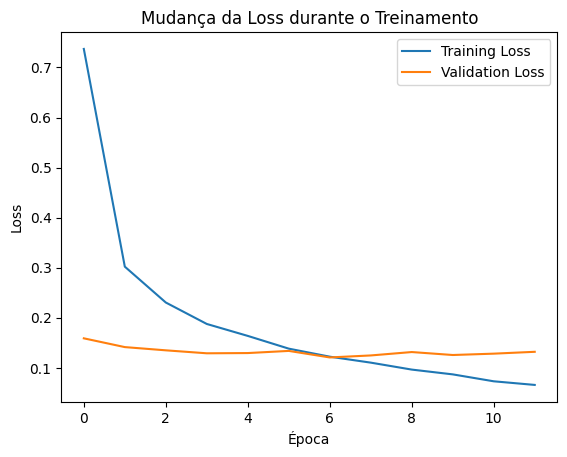

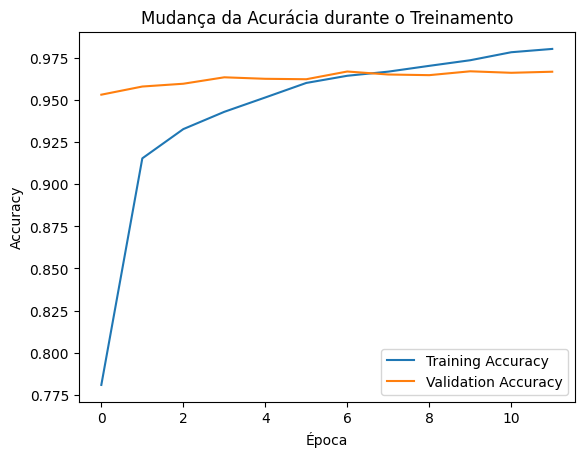

In [21]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# plt.ylim(0, 0.5)
# plt.yticks(np.arange(0, 0.5, 0.1))

# Plotagem da loss
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Mudança da Loss durante o Treinamento')
plt.legend()
plt.show()
# Plotagem da accuracy
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Mudança da Acurácia durante o Treinamento')
plt.legend()
plt.show()

In [ ]:
model.save('modelo.h5')